# Figure Machine

In [1]:
import mne
from wavelets import *
import matplotlib.pyplot as plt
import pywt
import numpy as np

### Denoising Demonstration

In [2]:
s9cprod_a = "/pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_09_2_a_112-epo.fif"

In [3]:
s9prodadata = mne.read_epochs(s9cprod_a)

Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_09_2_a_112-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


In [4]:
def dwt_denoise(data, wavelet='db4', level=7):
    coefficients = pywt.wavedec(data, wavelet, level=level)
    coefficients[-1] = np.zeros_like(coefficients[-1]) #d1 #get rid of these two as in Dash et al 2020.
    coefficients[-2] = np.zeros_like(coefficients[-2]) #d2
    return pywt.waverec(coefficients, wavelet)[:len(data)]

In [5]:
s9prodadata = s9prodadata.crop(-0.2, 0.6)
noisy_meg001 = s9prodadata[0]._data[0][0]
denoised_meg001 = dwt_denoise(data=noisy_meg001, wavelet='db4', level=5)

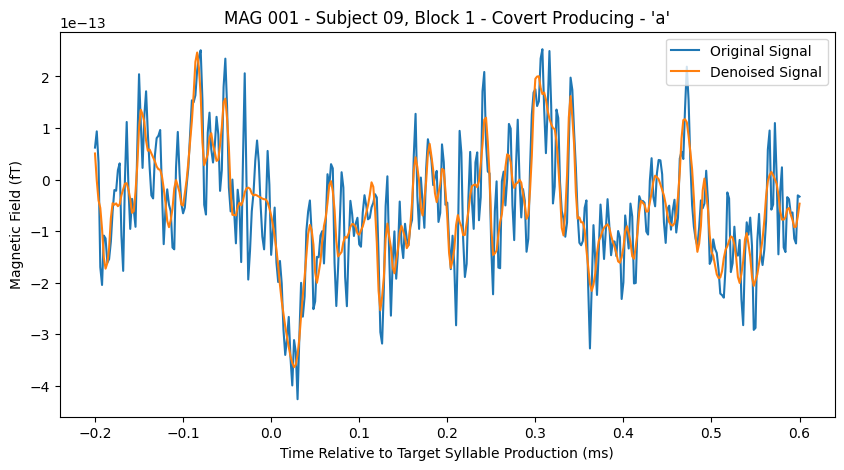

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(s9prodadata.times, noisy_meg001, label="Original Signal")
plt.plot(s9prodadata.times,denoised_meg001, label="Denoised Signal" )
plt.xlabel("Time Relative to Target Syllable Production (ms)")
plt.ylabel("Magnetic Field (fT)")
plt.legend(loc='upper right')
plt.title("MAG 001 - Subject 09, Block 1 - Covert Producing - 'a'")
plt.savefig("S9-B1-CP-a-noise-denoise.png", dpi=300, bbox_inches='tight')

In [68]:
s9prodadata.ch_names[0]

'MEG 001'

### Z-Score Distributions

In [3]:
zscore_coefs_file = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing/BCOM_22_3_e_114_coefficients.npy"
zscore_coefs = np.load(zscore_coefs_file, mmap_mode="r")

In [47]:
zscore_coefs[0][125].shape

(100, 401)

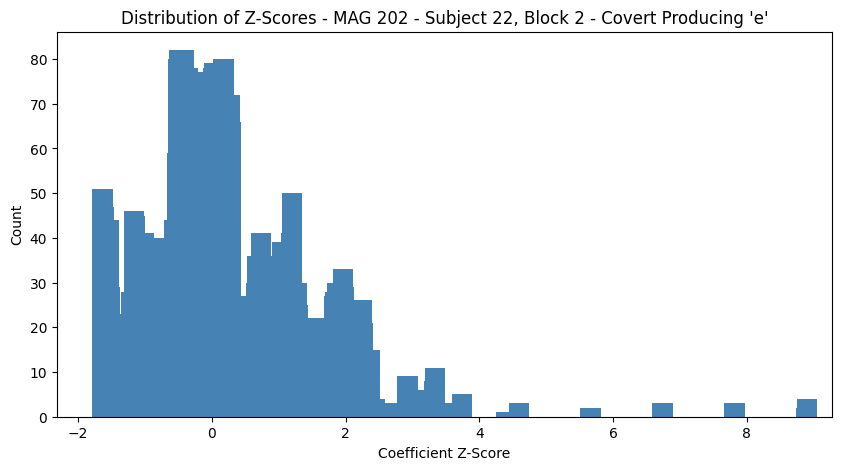

In [70]:
plt.figure(figsize=(10, 5))
plt.hist(zscore_coefs[0][200], width=0.3, color=['steelblue']*401)
plt.xlabel("Coefficient Z-Score")
plt.ylabel("Count")
plt.title("Distribution of Z-Scores - MAG 202 - Subject 22, Block 2 - Covert Producing 'e'")
plt.savefig("Zscores-cpe.png")

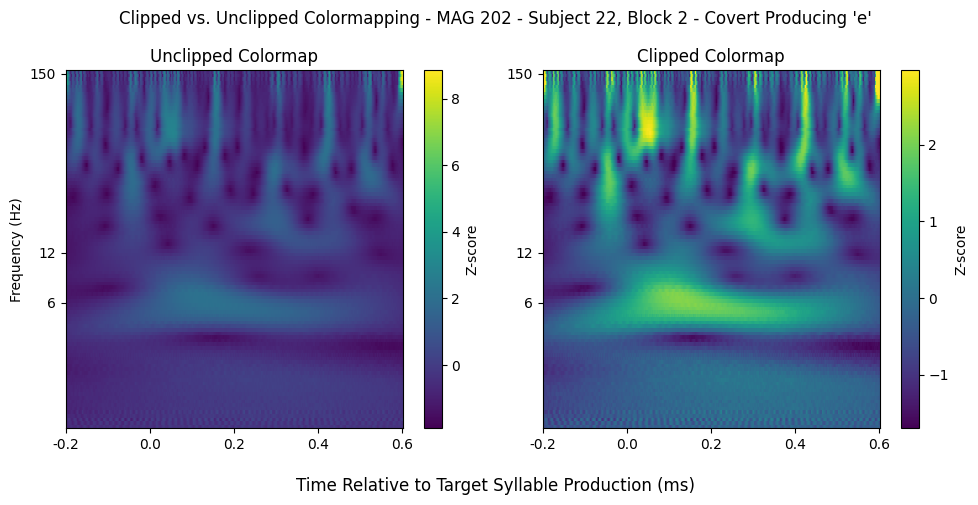

In [8]:
n_times = 401
times = np.linspace(-0.2, 0.6, n_times)
freqs = np.logspace(np.log10(1), np.log10(150), 100)



# Choose a few tick positions in sample‐space:
tick_idxs = [0, 100, 200, 300, 400]
tick_labels = [f"{times[i]:.1f}" for i in tick_idxs]

# Choose some tick indices for the y-axis (frequency bins)
freq_tick_idxs = [35, 49, 99]  # for example: lowest, mid, and highest frequency
freq_tick_labels = [f"{freqs[i]:.0f}" for i in freq_tick_idxs]




import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)  # wider figure

# Plot 1

qm = ax1.pcolormesh(zscore_coefs[0][200])
ax1.set_xticks(tick_idxs)
ax1.set_xticklabels(tick_labels)
ax1.set_yticks(freq_tick_idxs)
ax1.set_yticklabels(freq_tick_labels)
ax1.set_ylabel("Frequency (Hz)")
ax1.set_title("Unclipped Colormap")
cb1 = fig.colorbar(qm, ax=ax1)  # individual colorbar
cb1.set_label("Z-score")

# Plot 2
qm2 = ax2.pcolormesh(zscore_coefs[0][200], vmin=-1.7007, vmax=2.9722)
ax2.set_xticks(tick_idxs)
ax2.set_xticklabels(tick_labels)
ax2.set_yticks(freq_tick_idxs)
ax2.set_yticklabels(freq_tick_labels)
ax2.set_title("Clipped Colormap")
cb2 = fig.colorbar(qm2, ax=ax2)  # individual colorbar
cb2.set_label("Z-score")


# Shared x-label for both subplots
fig.supxlabel("Time Relative to Target Syllable Production (ms)")
fig.suptitle("Clipped vs. Unclipped Colormapping - MAG 202 - Subject 22, Block 2 - Covert Producing 'e'")

fig.tight_layout()
fig.savefig("unclipped-clipped-scalogram.png",
           dpi=300,
           bbox_inches='tight'
)



### 16x16 Scalogram

In [4]:
from plotting import ScalogramPlotter

In [5]:
plotter = ScalogramPlotter(dimensions=(16, 16), 
                               cmap='viridis',
                               index_list=np.arange(0, 247),
                               data_dir="/pasteur/appa/homes/cbangu/MEG-Decoding", 
                               save_dir="/pasteur/appa/homes/cbangu/MEG-Decoding", 
                               resolution=300, 
                               vmin=-1.7007, 
                               vmax=2.9722)

In [6]:
fig = plotter.plot_many(zscore_coefs[0])

plotting 0s for channel index: 247
plotting 0s for channel index: 248
plotting 0s for channel index: 249
plotting 0s for channel index: 250
plotting 0s for channel index: 251
plotting 0s for channel index: 252
plotting 0s for channel index: 253
plotting 0s for channel index: 254
plotting 0s for channel index: 255


In [12]:
fig.suptitle(
    "Spatio-Spectral-Temporal Spectrogram – Subject 22, Block 2 – Covert Producing 'e'",
    y=0.97
)
fig.savefig("ssts-s22-b2-cp-e.png", dpi=300)